## Préparation du dataset :

In [73]:
# Chargement des bibliothèques nécessaires
# NumPy et Pandas pour la manipulation des données
# Matplotlib et Seaborn pour la visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
#Chargement des données
# Nous utilisons la fonction read_csv de Pandas pour charger le fichier CSV.
# Le délimiteur ';' est spécifié pour s'assurer que les colonnes sont correctement lues.
dataset_path = "colon_cancer.csv" 
df = pd.read_csv(dataset_path , delimiter = ';')

In [75]:
# Affichage des premières lignes du dataset pour une première vérification de la structure.
df.head()

,id_sample,ADH1C,DHRS11,UGP2,SLC7A5,CTSS,DAO,NIBAN1,PRUNE2,FOXF2,...,BSPRY,CDHR2,ERRFI1,CLIC5,PLLP,GAL,CRYL1,YBX2,ANGPTL4,tissue_status
0,EPSM-COLON-0001,9.199944,6.090054,7.062512,3.864253,7.869368,8.465133,1.174665,0.975086,3.028995,...,5.528372,3.500730,2.893760,5.130743,1.485110,1.830484,6.379933,3.919293,3.031413,normal
1,EPSM-COLON-0002,7.767618,6.027985,6.318818,3.069581,6.410334,8.159814,5.959414,1.625518,2.984629,...,5.671788,4.658790,4.715374,5.438104,2.131466,2.097157,6.863173,0.322829,3.978531,normal
2,EPSM-COLON-0003,7.918904,5.885948,6.917742,3.188257,7.915549,8.004194,1.560386,2.379909,2.929762,...,4.596079,5.649376,4.047899,6.580938,1.447209,3.890943,6.209704,3.274407,3.714491,normal
3,EPSM-COLON-0004,9.053553,6.027985,7.081085,2.357523,5.657726,8.004194,3.548988,3.260031,3.313829,...,4.135061,5.437107,4.537381,4.615263,1.004454,1.840902,6.774063,3.320525,3.080796,normal
4,EPSM-COLON-0005,6.027822,5.791257,5.937685,4.137667,5.818999,8.056067,3.307945,5.208874,4.191695,...,3.674043,6.286182,4.715374,4.432410,0.159195,3.506561,6.150297,0.461184,5.140305,normal


In [76]:
# Vérification des valeurs manquantes
# Cette étape est cruciale pour s'assurer que les données sont complètes.
# Les valeurs manquantes peuvent impacter les performances des modèles de classification.
df.isna().sum()

id_sample        0
ADH1C            0
DHRS11           0
UGP2             0
SLC7A5           0
                ..
GAL              0
CRYL1            0
YBX2             0
ANGPTL4          0
tissue_status    0
Length: 62, dtype: int64

In [77]:
# Suppression de la colonne 'id_sample'
# Cette colonne est probablement un identifiant unique et n'apporte pas d'information pertinente pour la classification.
df.drop(columns=["id_sample"], inplace=True)

# Vérification après suppression
print(df.head())  


      ADH1C    DHRS11      UGP2    SLC7A5      CTSS       DAO    NIBAN1  \
0  9.199944  6.090054  7.062512  3.864253  7.869368  8.465133  1.174665   
1  7.767618  6.027985  6.318818  3.069581  6.410334  8.159814  5.959414   
2  7.918904  5.885948  6.917742  3.188257  7.915549  8.004194  1.560386   
3  9.053553  6.027985  7.081085  2.357523  5.657726  8.004194  3.548988   
4  6.027822  5.791257  5.937685  4.137667  5.818999  8.056067  3.307945   

     PRUNE2     FOXF2    TENT5C  ...     BSPRY     CDHR2    ERRFI1     CLIC5  \
0  0.975086  3.028995  6.350919  ...  5.528372  3.500730  2.893760  5.130743   
1  1.625518  2.984629  4.686086  ...  5.671788  4.658790  4.715374  5.438104   
2  2.379909  2.929762  4.281126  ...  4.596079  5.649376  4.047899  6.580938   
3  3.260031  3.313829  4.821072  ...  4.135061  5.437107  4.537381  4.615263   
4  5.208874  4.191695  5.181036  ...  3.674043  6.286182  4.715374  4.432410   

       PLLP       GAL     CRYL1      YBX2   ANGPTL4  tissue_status  

In [78]:
# Séparation des features et de la variable cible
X = df.drop(columns=['tissue_status'])
y = df['tissue_status'].map({'normal': 0, 'tumoral': 1})

In [79]:
# Séparation des données en ensembles d'entraînement et de test
# 80% des données sont utilisées pour l'entraînement, 20% pour le test.X
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Exploration des données : 

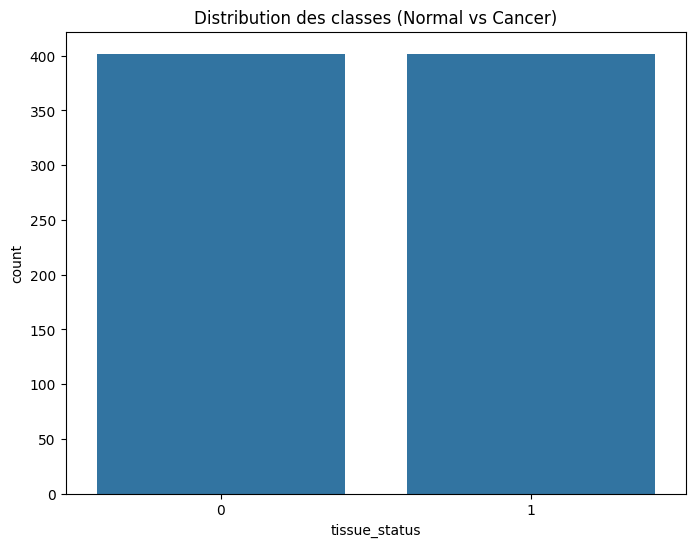

In [80]:
# Visualisation des distributions des classes
# Cette étape permet de vérifier si le dataset est équilibré ou déséquilibré.
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title("Distribution des classes (Normal vs Cancer)")
plt.show()

Le dataset est équilibré, ce qui est une bonne nouvelle pour l'entraînement des modèles de classification.

In [81]:
df.describe()

,ADH1C,DHRS11,UGP2,SLC7A5,CTSS,DAO,NIBAN1,PRUNE2,FOXF2,TENT5C,...,SYTL2,BSPRY,CDHR2,ERRFI1,CLIC5,PLLP,GAL,CRYL1,YBX2,ANGPTL4
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,...,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,5.588943,4.354817,5.557694,4.513570,6.717535,7.218184,2.737937,2.806573,3.064394,3.658318,...,3.599294,4.682718,4.225014,4.575397,4.097244,1.823268,2.822931,6.096634,2.801603,2.596452
std,2.889901,1.431179,1.150565,1.614450,1.077821,1.411969,1.466906,1.243826,1.191486,1.258059,...,1.054504,0.917027,1.656088,0.859138,1.276589,0.721587,1.338349,0.840122,1.011971,1.000962
min,0.610504,1.427079,2.027201,1.685024,3.668691,1.164886,0.716737,0.368200,0.610504,0.858074,...,1.286220,1.868389,0.637047,2.250347,1.015235,0.118945,0.610504,2.031471,0.000000,0.757246
25%,3.174250,3.118844,4.611060,3.030022,6.065937,6.241714,1.550382,1.864561,2.198244,2.655091,...,2.878356,4.349295,2.921069,3.958903,3.131267,1.337715,1.840902,5.489589,2.277491,1.824823
50%,5.467024,4.125990,5.412204,4.382953,6.762908,7.578782,2.297732,2.741509,2.900393,3.605686,...,3.613342,4.869313,4.116251,4.537381,3.975276,1.689671,2.591044,6.150297,2.905605,2.442378
75%,8.444756,5.696566,6.556969,5.918848,7.485487,8.263561,3.669509,3.574304,3.752899,4.686086,...,4.417632,5.249372,5.507864,5.070072,5.118110,2.211967,3.661012,6.728052,3.505721,3.139738
max,10.263846,7.022241,7.571114,8.059430,8.990703,10.079135,6.682541,6.591924,6.276628,6.350919,...,5.713776,7.029946,9.045672,7.647284,7.129499,4.763212,7.545757,8.723941,5.169059,6.493643


Certaines variables ont un minimum de 0, ce qui signifie que certains gènes ne sont pas du tout exprimés dans certains échantillons.

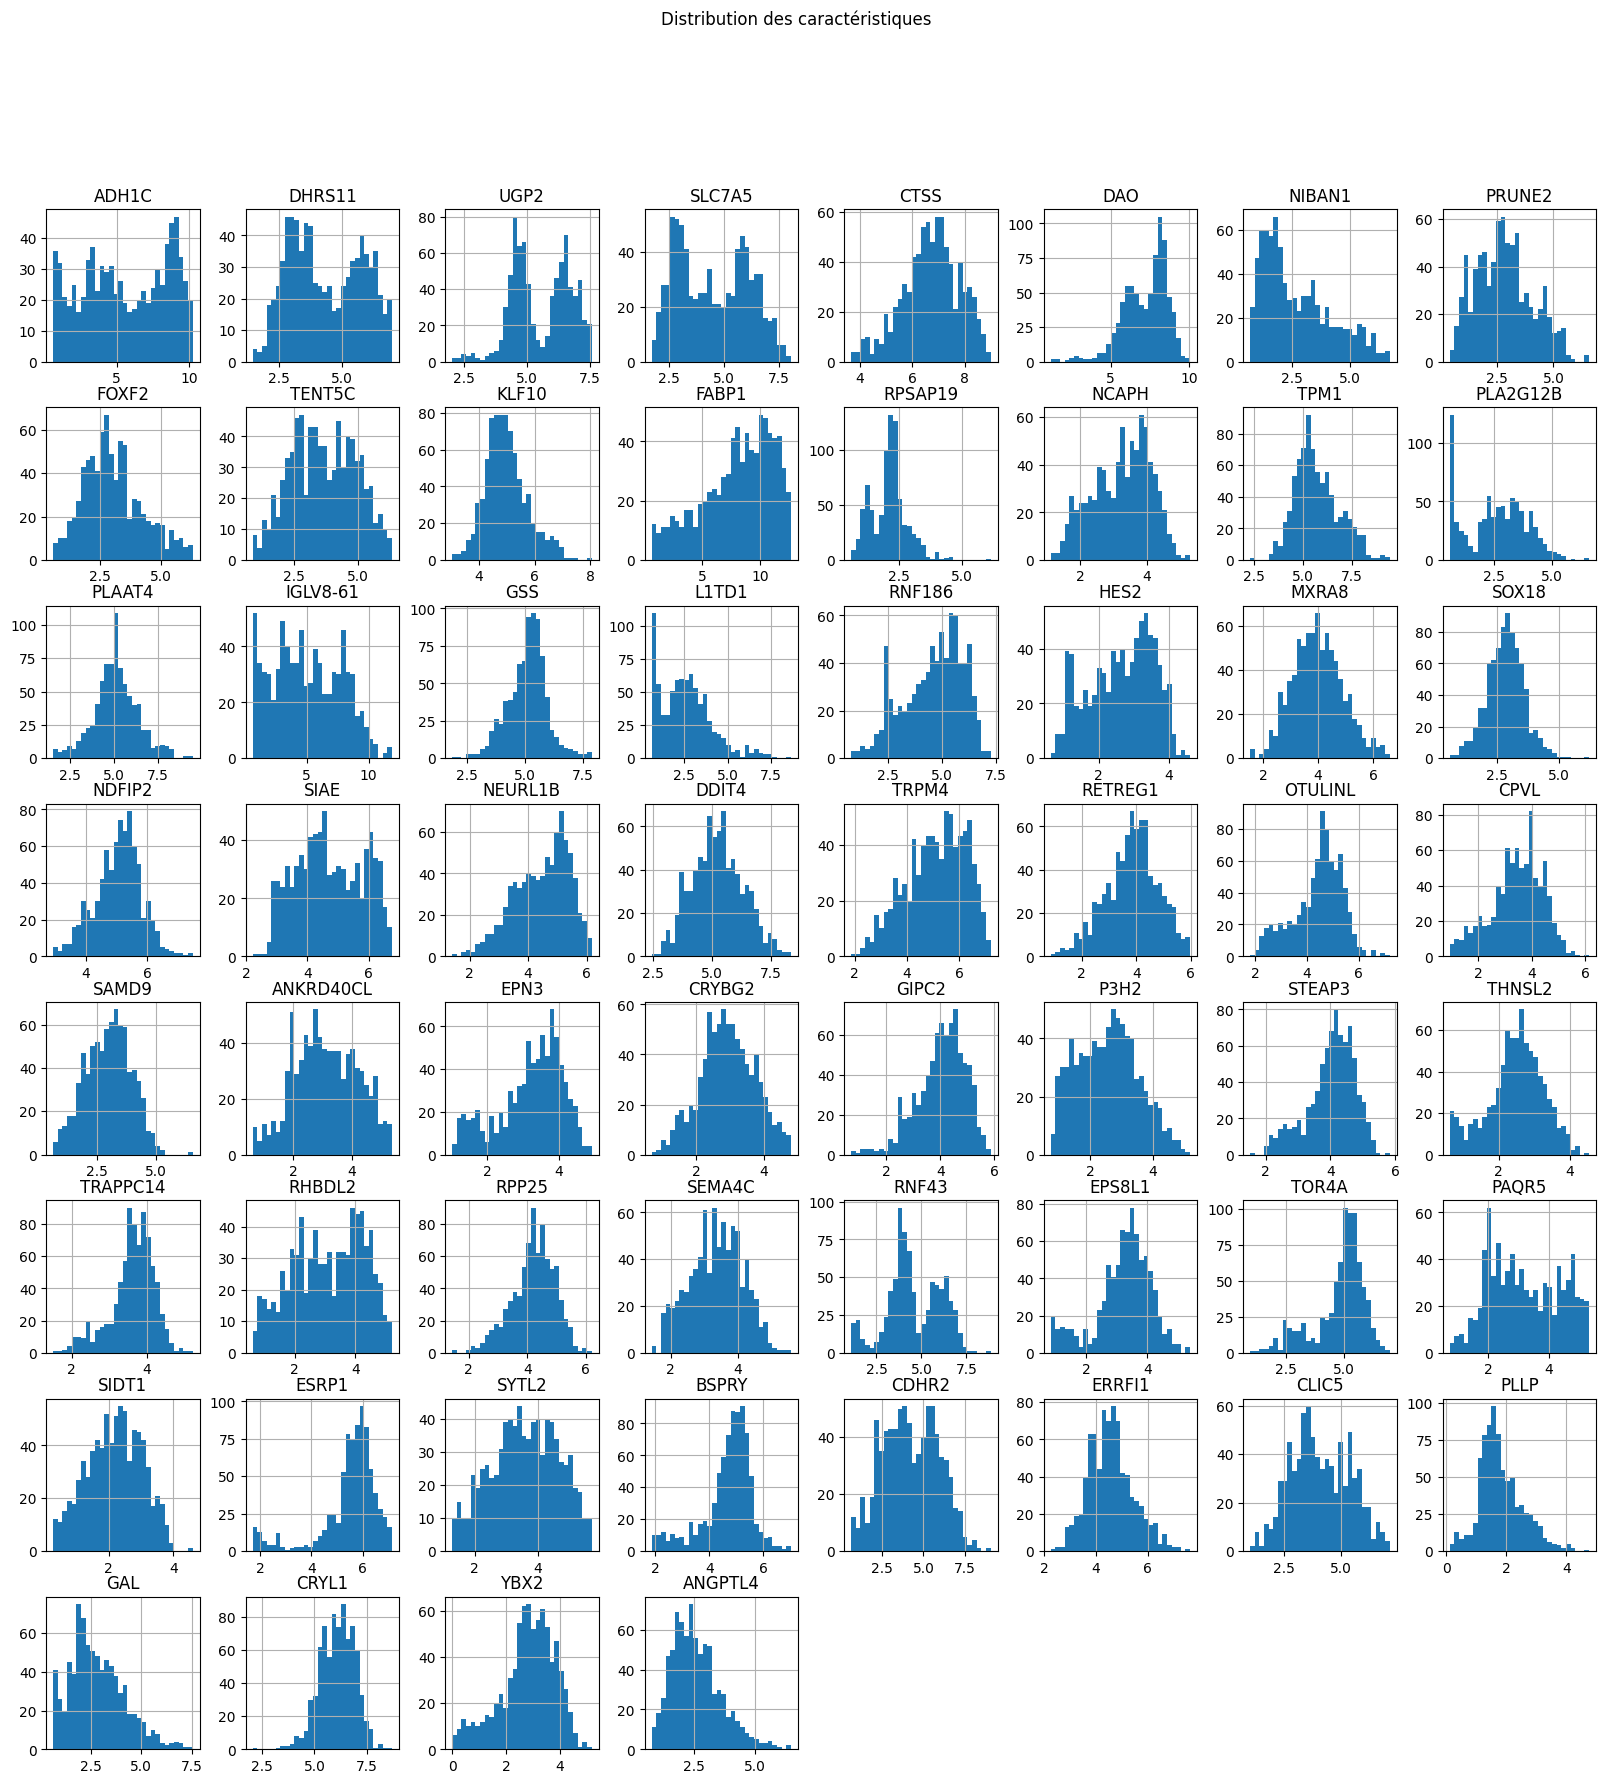

In [82]:
df.hist(figsize=(20, 20), bins=30)
plt.suptitle("Distribution des caractéristiques")
plt.show()

histogramme permet de visualiser la répartition des valeurs des différentes caractéristiques (gènes).

Certaines variables sont bien équilibrées et peuvent être directement utilisées dans les modèles, tandis que d'autres contiennent des valeurs aberrantes qui pourraient nécessiter un traitement avant l'entraînement du modèle.

## Application des algorithmes de classification : 

Logistic Regression Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        81

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



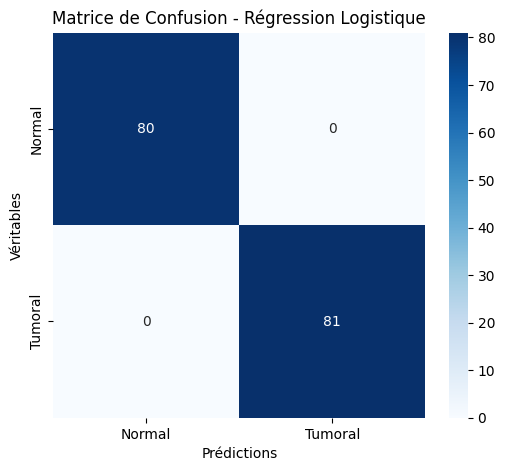

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate performance
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {log_reg_acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Calculer la matrice de confusion avant de l'afficher
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# 1. Matrice de confusion sous forme de heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_log_reg, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Tumoral'], yticklabels=['Normal', 'Tumoral'])
plt.title("Matrice de Confusion - Régression Logistique")
plt.xlabel('Prédictions')
plt.ylabel('Véritables')
plt.show()


Le modèle de régression logistique a obtenu une précision parfaite de 1.0000 sur l’ensemble de test.

Le rapport de classification montre que le modèle a obtenu des scores parfaits pour la précision, le rappel et le F1-score pour les deux classes, ce qui signifie qu'il n'a fait aucune erreur.

La matrice de confusion confirme que toutes les prédictions étaient correctes (pas de faux positifs ni de faux négatifs).

         Gene  Coefficient
44      RNF43     0.945012
3      SLC7A5     0.876286
2        UGP2    -0.718846
5         DAO    -0.672351
26    NEURL1B    -0.647466
13      NCAPH     0.536046
8       FOXF2    -0.531378
27      DDIT4     0.511566
54      CLIC5    -0.467667
0       ADH1C    -0.442681
33  ANKRD40CL    -0.439784
47      PAQR5    -0.432132
6      NIBAN1    -0.411950
1      DHRS11    -0.402027
16     PLAAT4    -0.387788
9      TENT5C    -0.373778
57      CRYL1    -0.362022
31       CPVL    -0.360299
45     EPS8L1     0.356522
23      SOX18    -0.346477


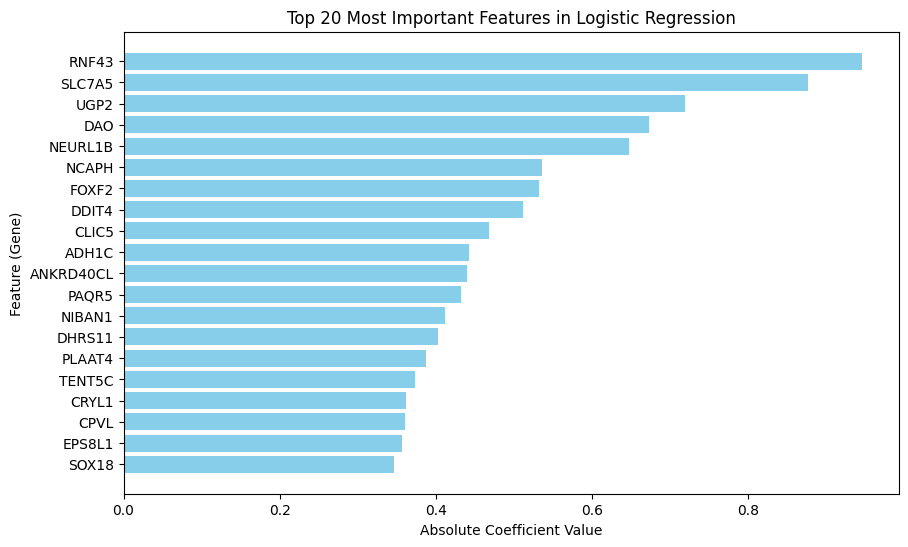

In [84]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Encodage de la target
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Modèle
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train_encoded)

# Récupérer l’importance des coefficients
coefficients = model.coef_[0]

# Créer un DataFrame pour afficher l’importance par gène
importance_df = pd.DataFrame({
    'Gene': X_train.columns,
    'Coefficient': coefficients
})

# Trier par importance absolue
importance_df['Abs_Coefficient'] = np.abs(importance_df['Coefficient'])
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Afficher les gènes les plus influents
print(importance_df[['Gene', 'Coefficient']].head(20))  # Top 10 gènes# Display the top 20 most important features

# Visualize the Top 20 Features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Gene'][:20], importance_df['Abs_Coefficient'][:20], color='skyblue')
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature (Gene)")
plt.title("Top 20 Most Important Features in Logistic Regression")
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()



La sortie montre les 20 gènes les plus influents (avec leur coefficient), dont certains sont positifs (indiquant qu'ils augmentent la probabilité d'une classe) et d'autres sont négatifs (indiquant qu'ils réduisent la probabilité).

Le graphique final aide à visualiser l'importance de ces gènes dans la prédiction du modèle de régression logistique.

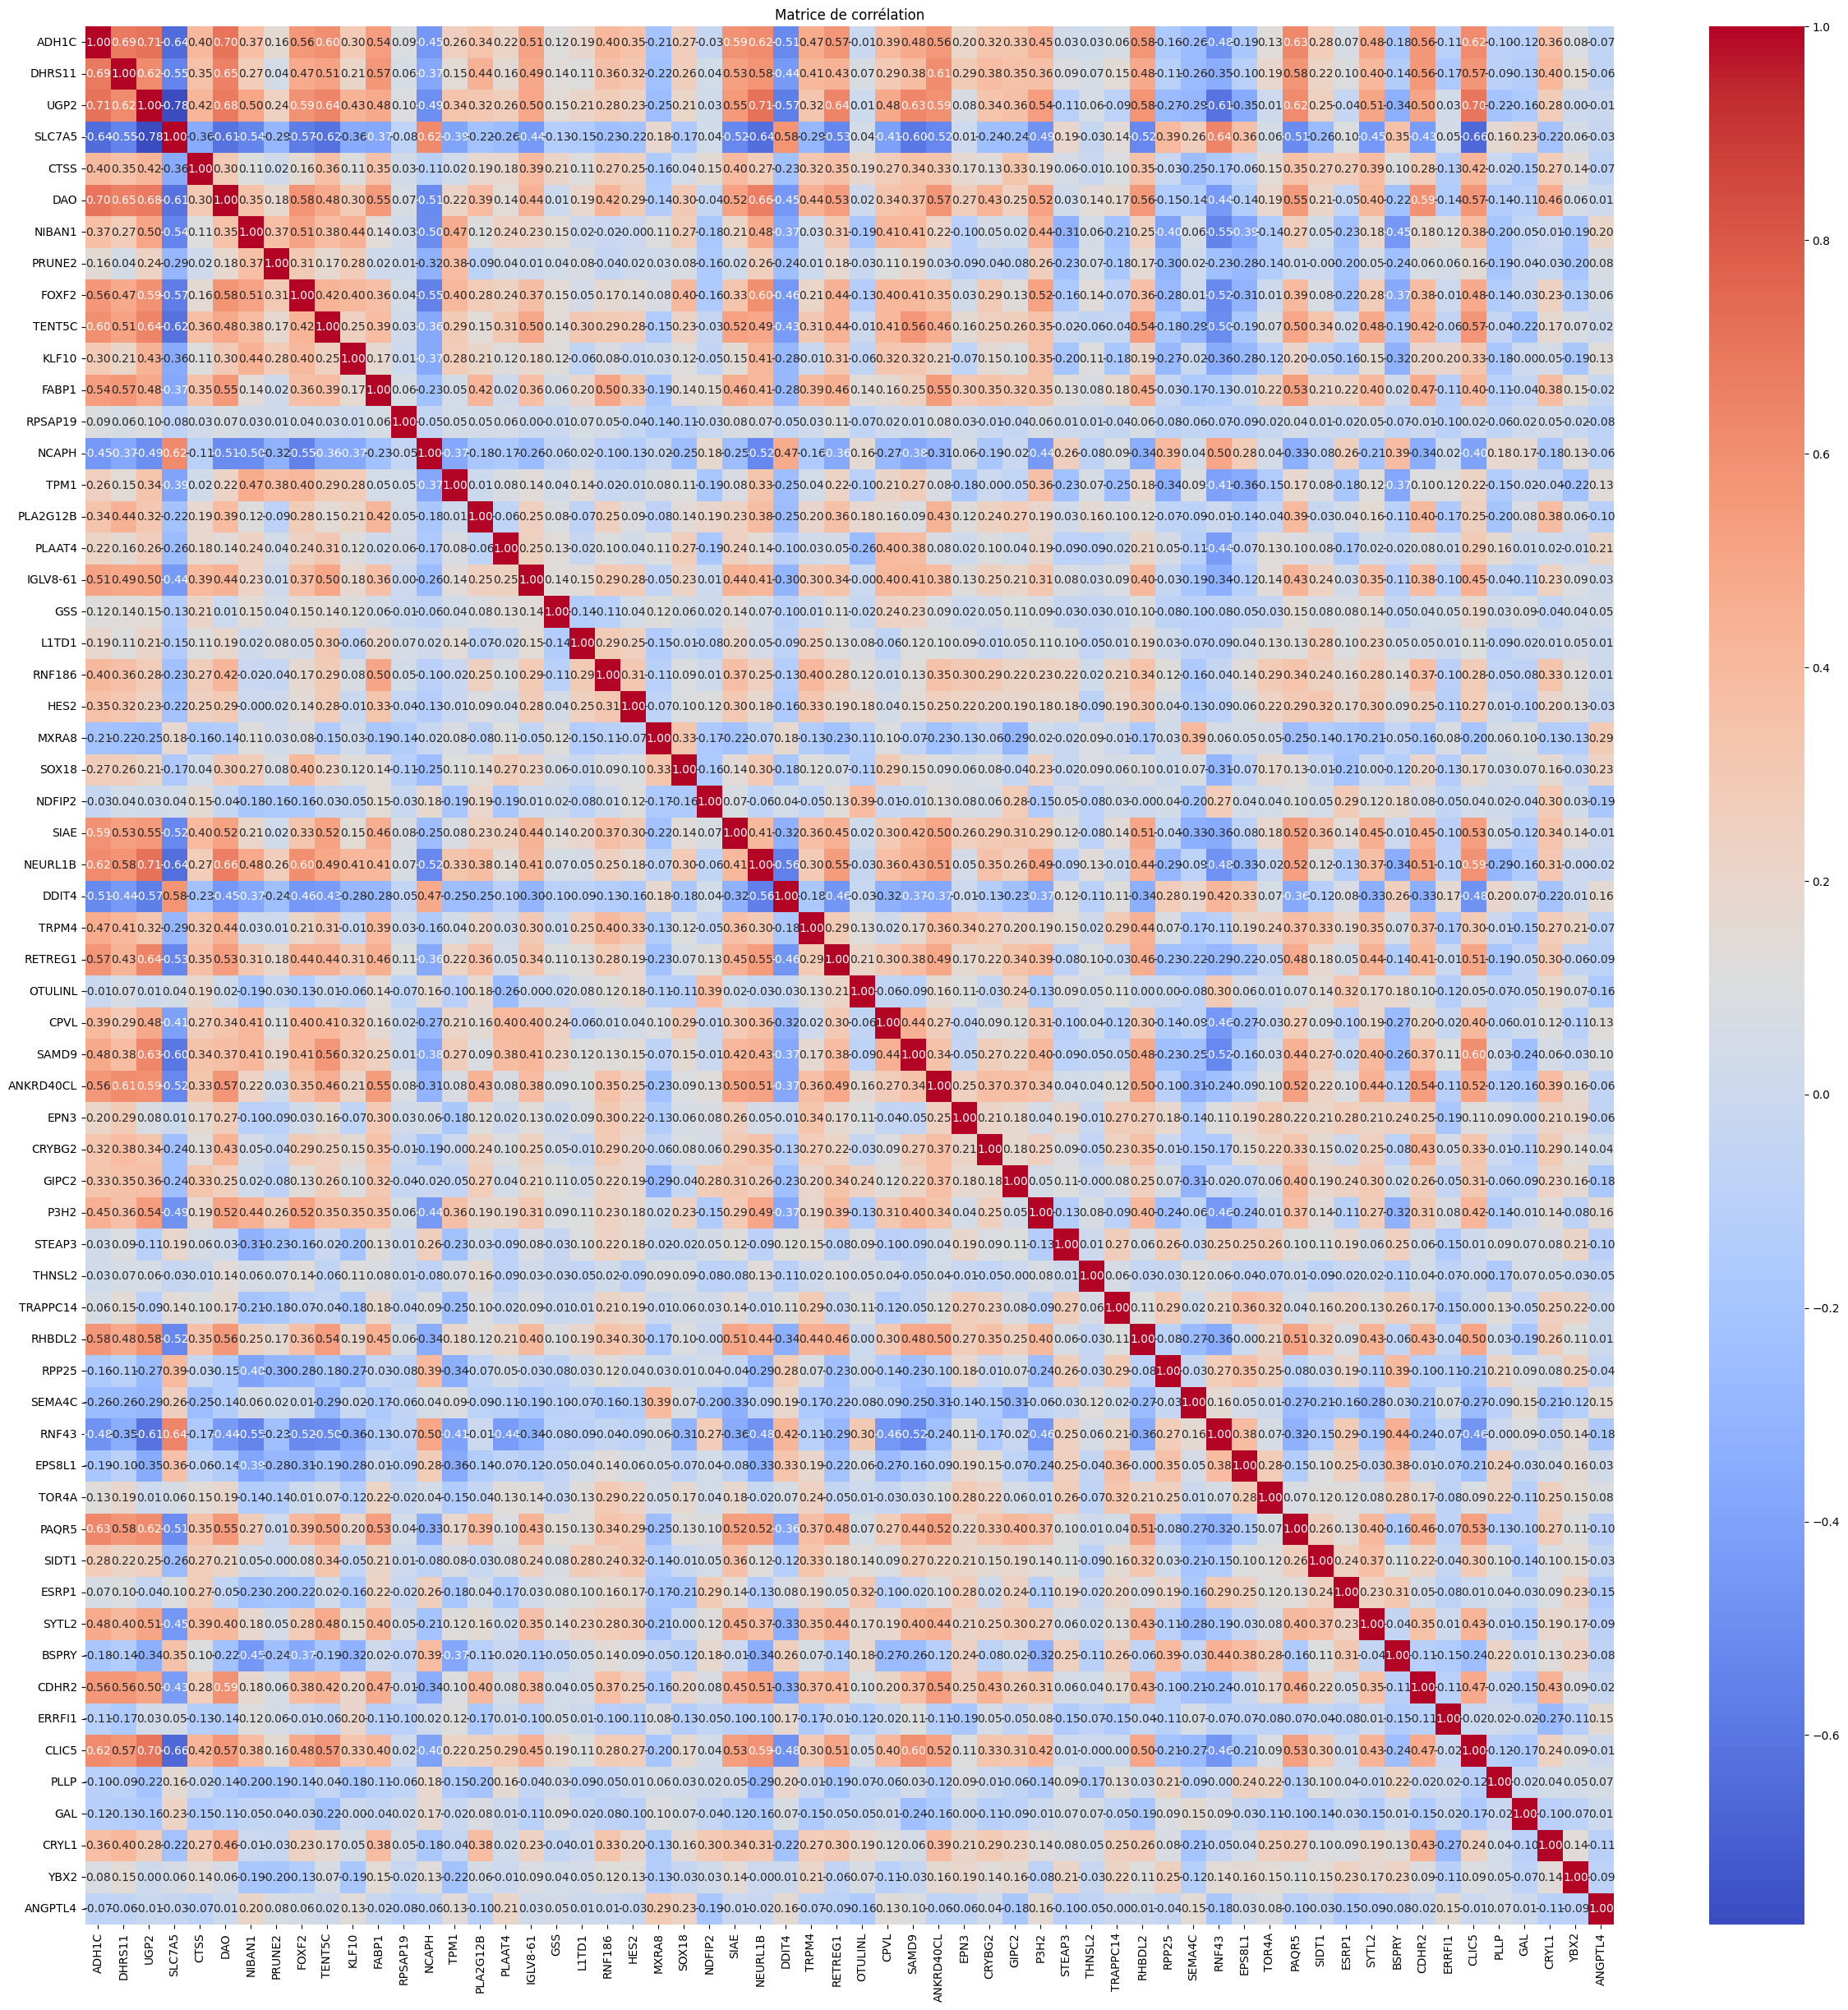

In [85]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.drop(columns=['tissue_status']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

Chaque cellule de la matrice montre la valeur de la corrélation entre deux variables. Les couleurs de la heatmap permettent de visualiser rapidement la force de ces corrélations :

Les zones rouges correspondent à des corrélations positives fortes.

Les zones bleues correspondent à des corrélations négatives fortes.

Les zones proches du blanc indiquent une faible ou aucune corrélation.


Logistic Regression Results using RNF43 gene:
--------------------------------------------
Accuracy: 0.8447

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86        81
           1       0.91      0.76      0.83        80

    accuracy                           0.84       161
   macro avg       0.85      0.84      0.84       161
weighted avg       0.85      0.84      0.84       161



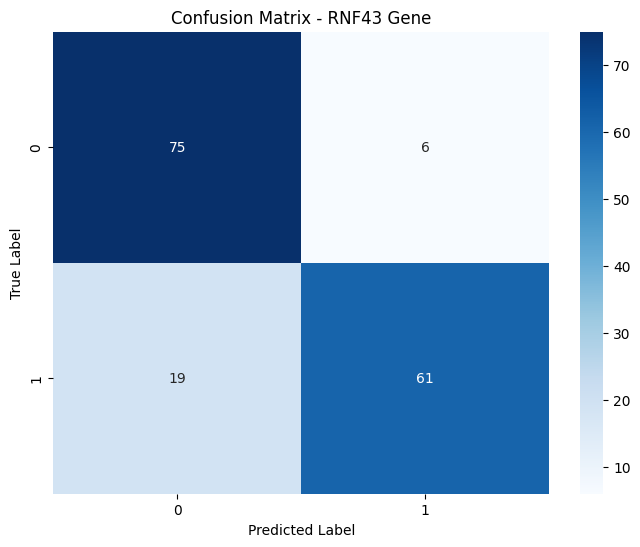

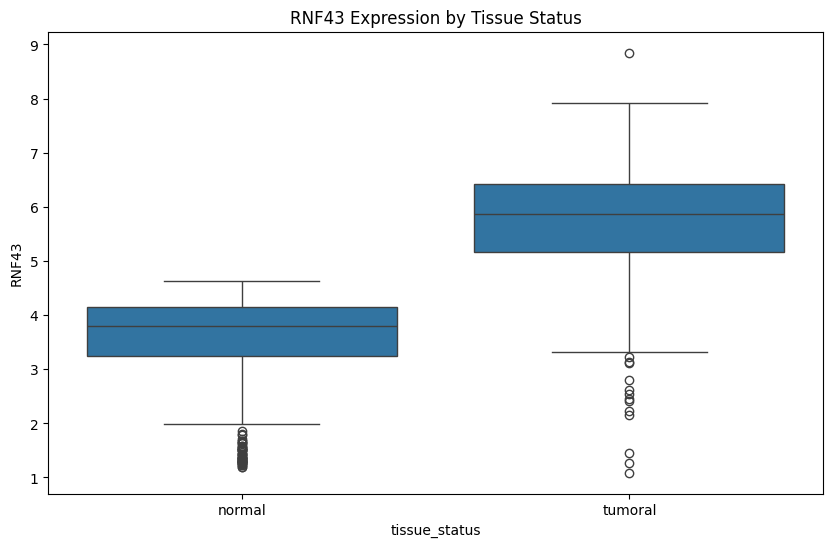

In [86]:

# Extract RNF43 feature and target variable
X = df[['RNF43']]  # Using only RNF43 gene
y = df['tissue_status']  # Target variable

# Convert target to numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)

# Print results
print("\nLogistic Regression Results using RNF43 gene:")
print("--------------------------------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - RNF43 Gene')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot RNF43 distribution by tissue status
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['tissue_status'], y=df['RNF43'])
plt.title('RNF43 Expression by Tissue Status')
plt.show()

Le modèle de régression logistique montre une bonne capacité de discrimination entre les classes à partir du gène RNF43 avec une performance relativement bonne avec 84.47% d'exactitude.

Le rapports de classification montre que le modèle est plus précis pour prédire la classe tumoral (1), mais a un meilleur rappel pour la classe normal (0).

La matrice de confusion montre quelques erreurs de prédiction, mais dans l'ensemble, le modèle semble bien fonctionner.

Le boxplot permet de vérifier visuellement si le gène RNF43 pourrait être un bon prédicteur pour la tâche, en montrant si ses valeurs sont bien séparées entre les différentes classes de tissu.


Logistic Regression Results using SLC7A5 gene:
--------------------------------------------
Accuracy: 0.9317

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        81
           1       0.95      0.91      0.93        80

    accuracy                           0.93       161
   macro avg       0.93      0.93      0.93       161
weighted avg       0.93      0.93      0.93       161



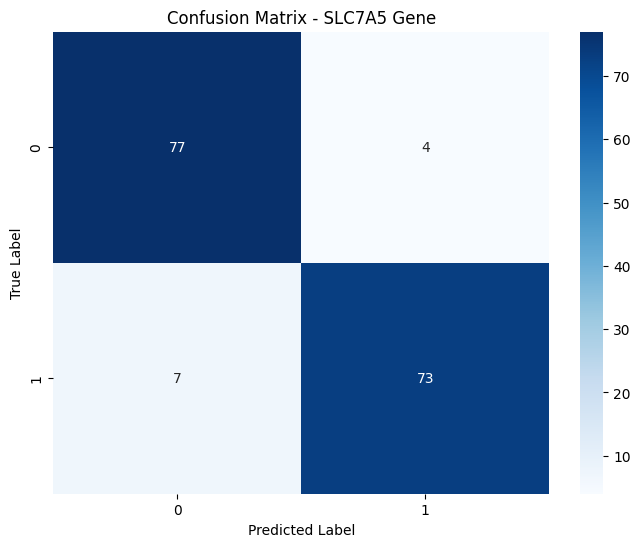

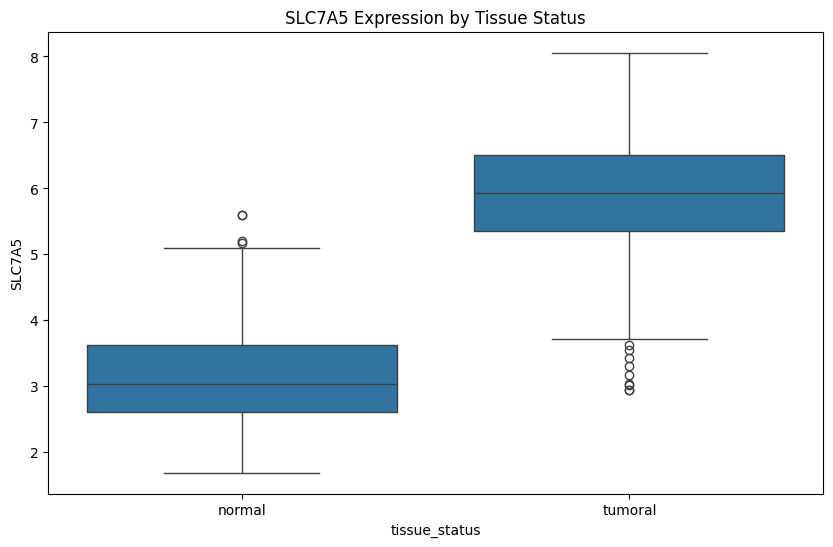

In [21]:
# Analysis for SLC7A5 gene
X = df[['RNF43','SLC7A5']]  # Using only SLC7A5 gene
y = df['tissue_status']  # Target variable

# Convert target to numeric
y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)

# Print results
print("\nLogistic Regression Results using SLC7A5 gene:")
print("--------------------------------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SLC7A5 Gene')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot SLC7A5 distribution by tissue status
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['tissue_status'], y=df['SLC7A5'])
plt.title('SLC7A5 Expression by Tissue Status')
plt.show()

le modèle avec RNF43 et SLC7A5 offre une performance solide pour prédire tissue_statusavec une très bonne performance avec une exactitude de 93.17%.

Le rapport de classification montre une précision et un rappel élevés pour les deux classes, avec un F1-score équilibré de 93%.

Le modèle semble bien différencier les classes normal et tumoral, et la matrice de confusion montre que les erreurs de prédiction sont relativement faibles.

Le boxplot de SLC7A5 montre probablement une bonne séparation entre les classes, ce qui soutient l'idée que ce gène contribue de manière significative à la tâche de classification.


Logistic Regression Results using UGP2 gene:
--------------------------------------------
Accuracy: 0.9317

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        81
           1       0.95      0.91      0.93        80

    accuracy                           0.93       161
   macro avg       0.93      0.93      0.93       161
weighted avg       0.93      0.93      0.93       161



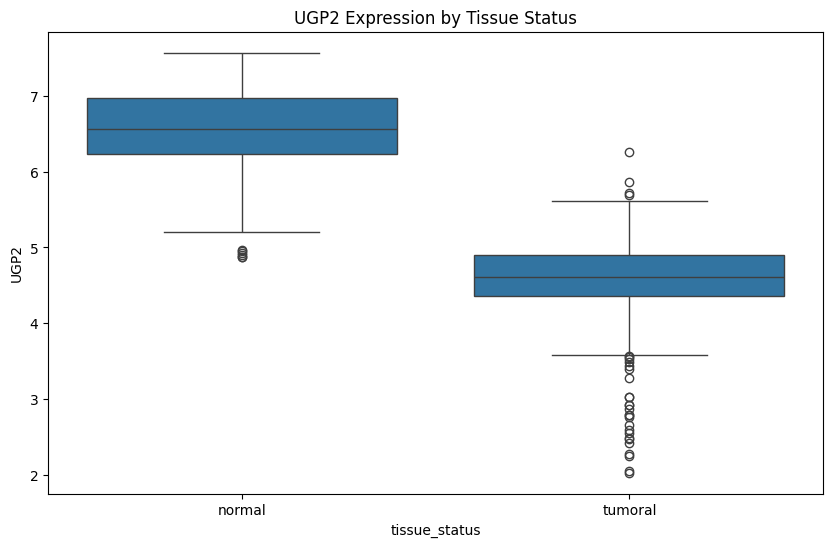

In [22]:

# Update feature selection to include UGP2
X = df[['RNF43', 'SLC7A5', 'UGP2']]  # Using all three genes
y = df['tissue_status']  # Target variable

# Convert target to numeric
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print results
print("\nLogistic Regression Results using UGP2 gene:")
print("--------------------------------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# After the existing visualizations, add a boxplot for UGP2
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['tissue_status'], y=df['UGP2'])
plt.title('UGP2 Expression by Tissue Status')
plt.show()


Logistic Regression Results using all four genes (RNF43, SLC7A5, UGP2, DAO):
--------------------------------------------
Accuracy: 0.9938

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        81
           1       0.99      1.00      0.99        80

    accuracy                           0.99       161
   macro avg       0.99      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



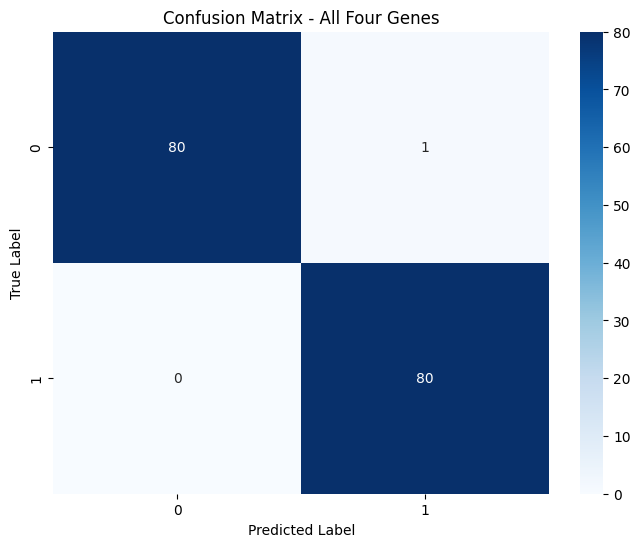

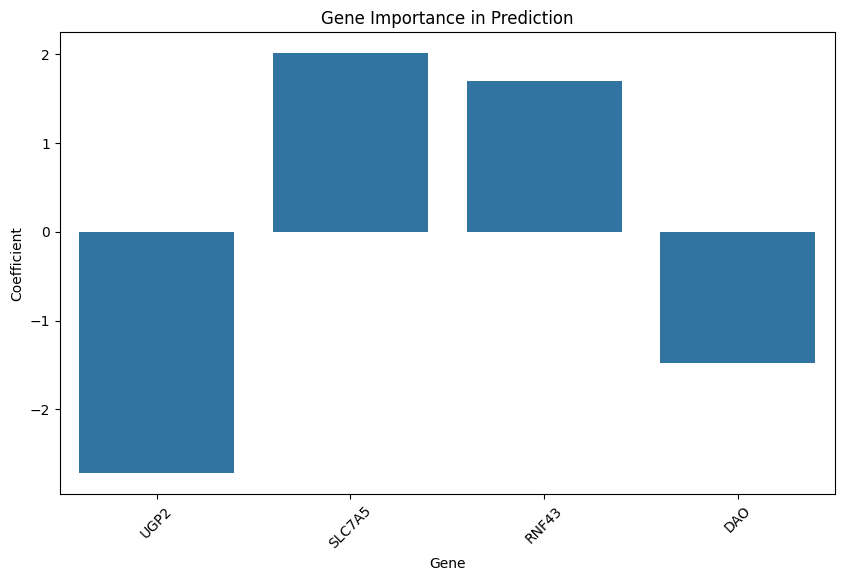

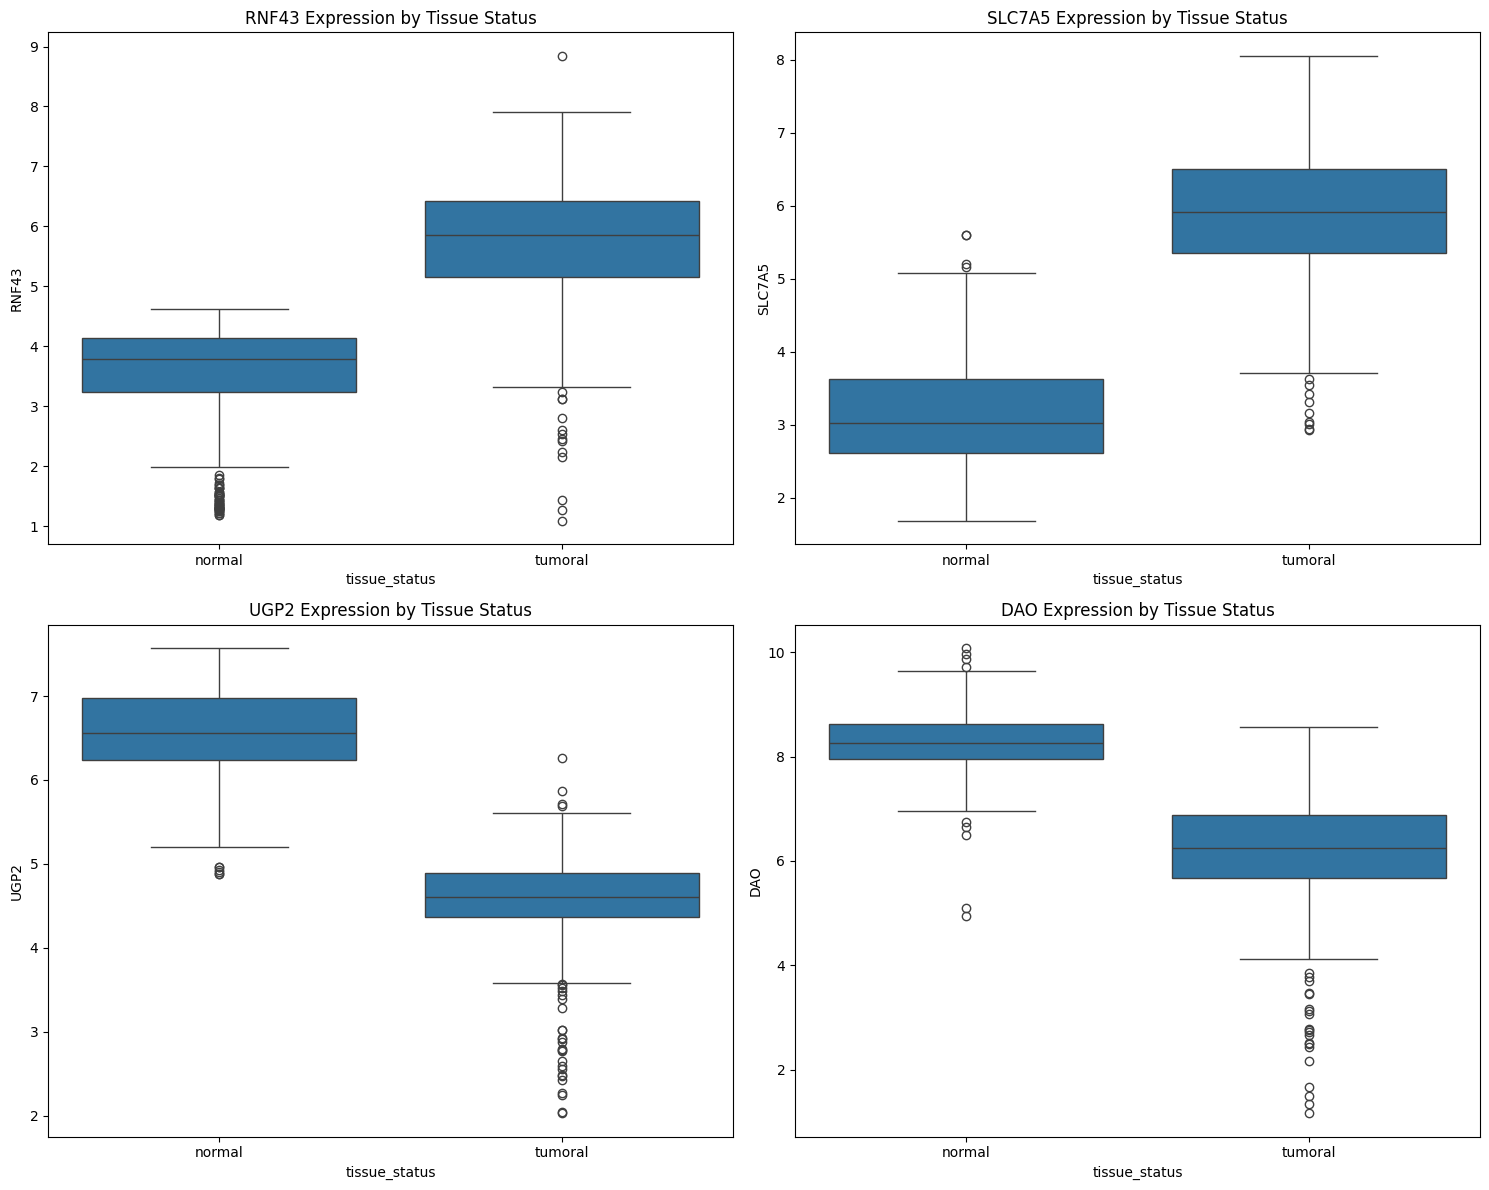

In [23]:

# Update feature selection to include all four genes
X = df[['RNF43', 'SLC7A5', 'UGP2', 'DAO']]  # Using all four genes
y = df['tissue_status']  # Target variable

# Convert target to numeric
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)

# Print results
print("\nLogistic Regression Results using all four genes (RNF43, SLC7A5, UGP2, DAO):")
print("--------------------------------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - All Four Genes')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'Gene': ['RNF43', 'SLC7A5', 'UGP2', 'DAO'],
    'Coefficient': log_reg.coef_[0]
})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Gene', y='Coefficient', data=feature_importance)
plt.title('Gene Importance in Prediction')
plt.xticks(rotation=45)
plt.show()

# Plot distribution of all genes
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
genes = ['RNF43', 'SLC7A5', 'UGP2', 'DAO']
for i, gene in enumerate(genes):
    sns.boxplot(x=df['tissue_status'], y=df[gene], ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{gene} Expression by Tissue Status')
plt.tight_layout()
plt.show()


Logistic Regression Results using all five genes (RNF43, SLC7A5, UGP2, DAO, NEURL1B):
--------------------------------------------
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        80

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



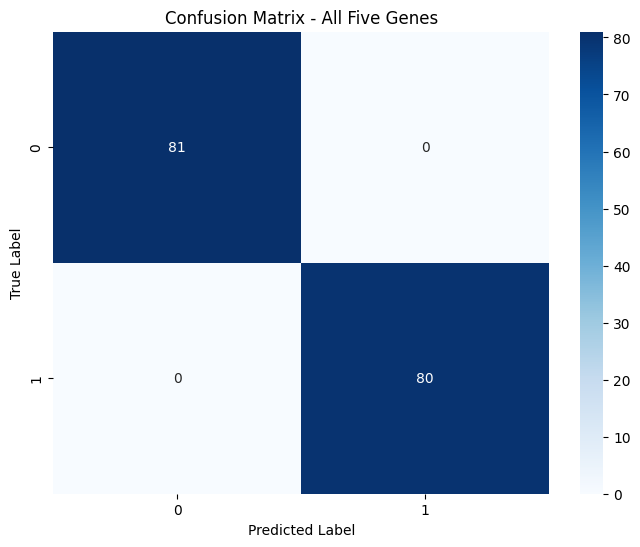

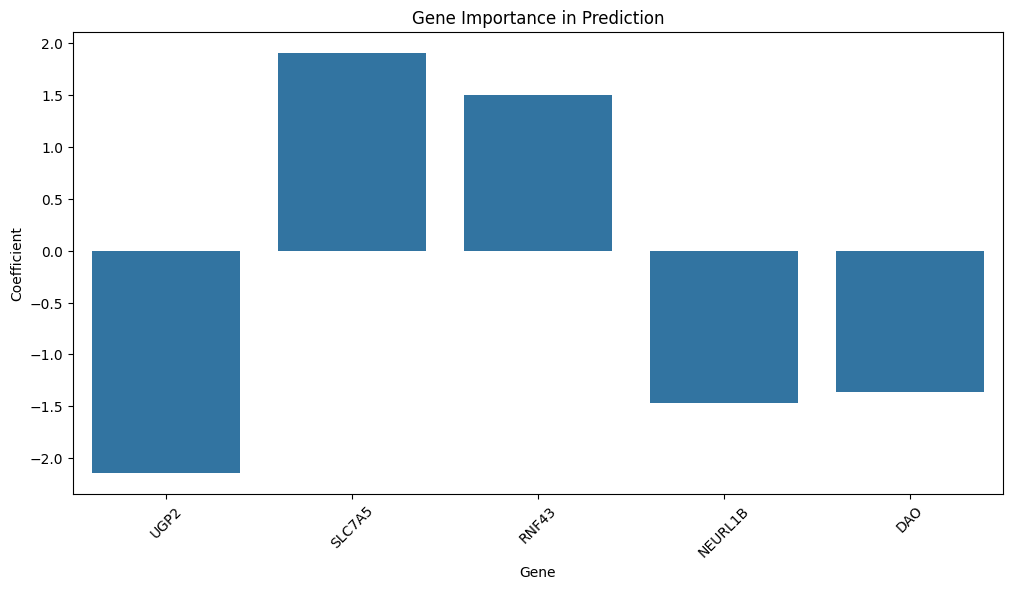

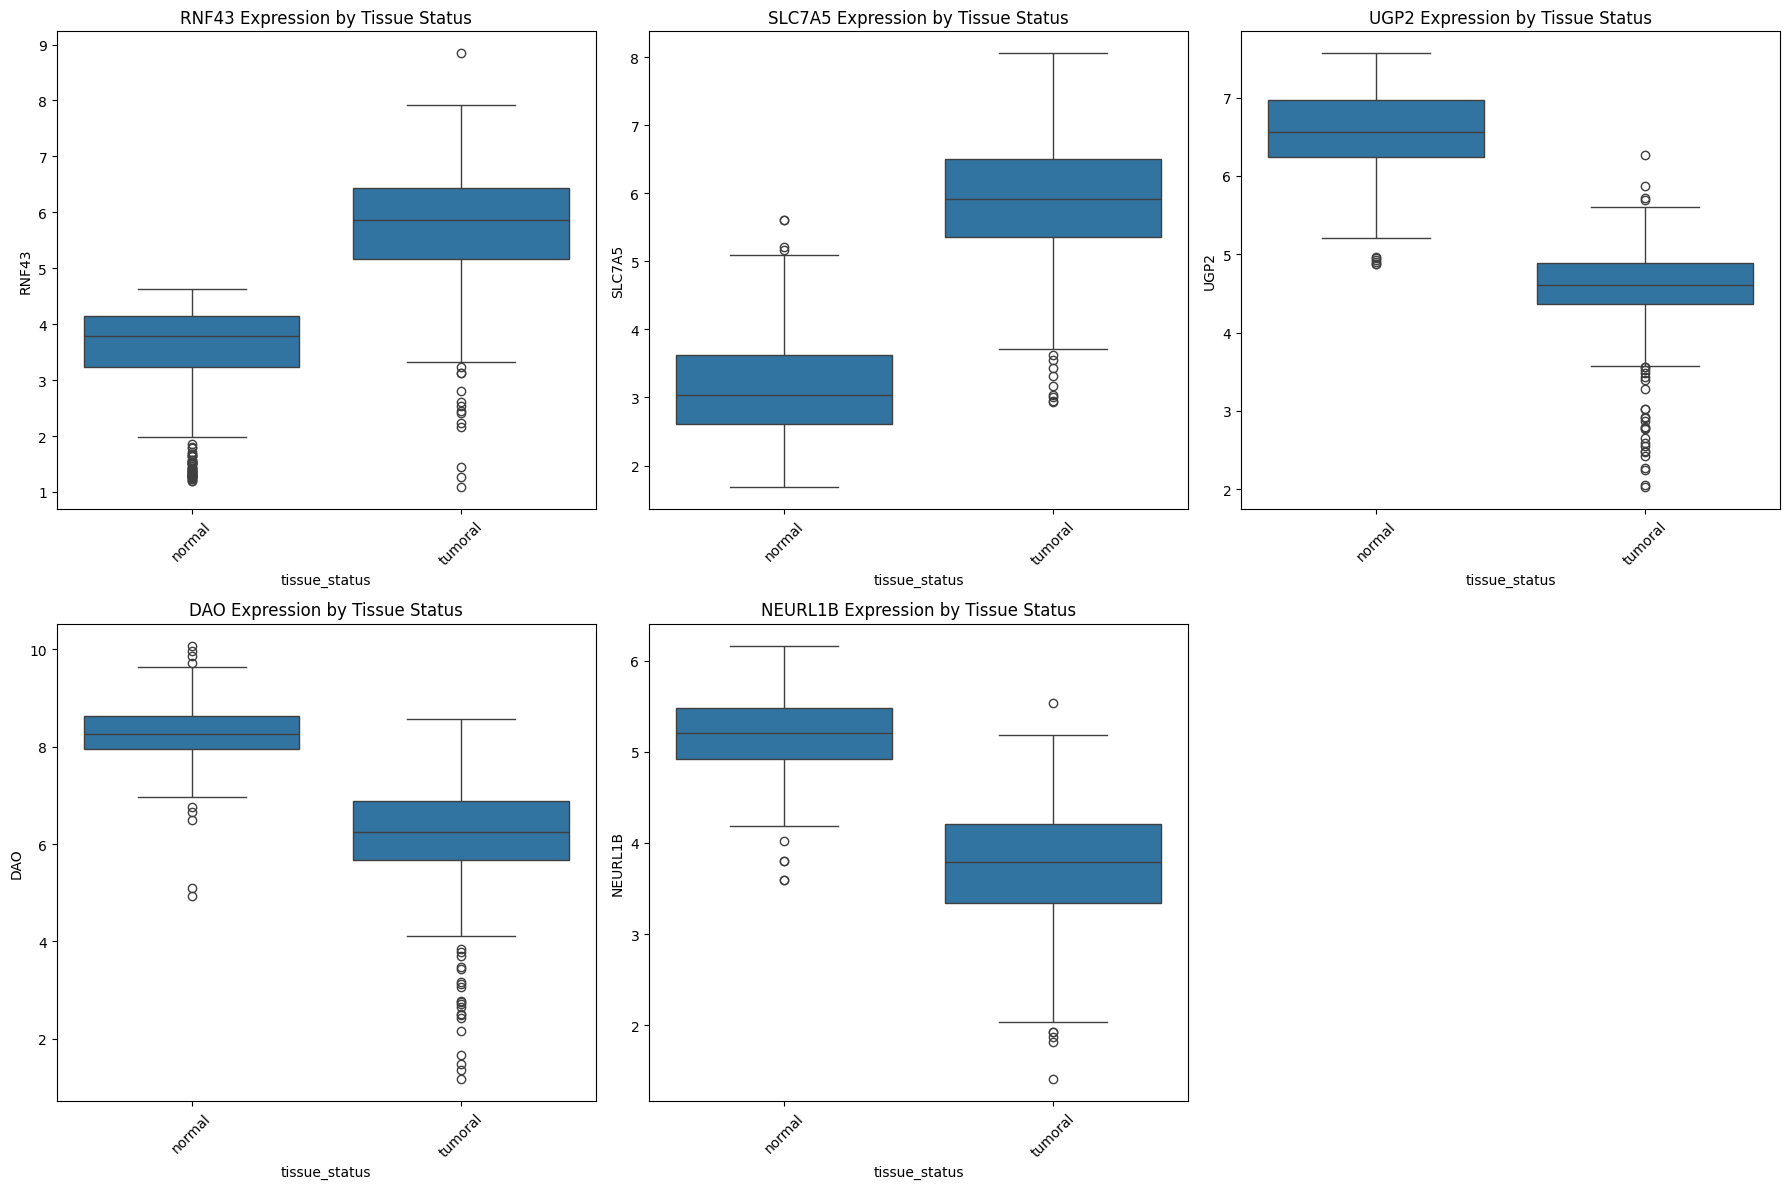

In [55]:

# Update feature selection to include all five genes
X = df[['RNF43', 'SLC7A5', 'UGP2', 'DAO', 'NEURL1B']]  # Using all five genes
y = df['tissue_status']  # Target variable

# Convert target to numeric
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)

# Print results
print("\nLogistic Regression Results using all five genes (RNF43, SLC7A5, UGP2, DAO, NEURL1B):")
print("--------------------------------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - All Five Genes')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'Gene': ['RNF43', 'SLC7A5', 'UGP2', 'DAO', 'NEURL1B'],
    'Coefficient': log_reg.coef_[0]
})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Gene', y='Coefficient', data=feature_importance)
plt.title('Gene Importance in Prediction')
plt.xticks(rotation=45)
plt.show()

# Plot distribution of all genes
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
genes = ['RNF43', 'SLC7A5', 'UGP2', 'DAO', 'NEURL1B']
for i, gene in enumerate(genes):
    ax = axes[i//3, i%3] if i < 5 else axes[1, 2]
    sns.boxplot(x=df['tissue_status'], y=df[gene], ax=ax)
    ax.set_title(f'{gene} Expression by Tissue Status')
    ax.tick_params(axis='x', rotation=45)

# Remove the empty subplot
if len(genes) % 3 != 0:
    fig.delaxes(axes[1, 2])
    
plt.tight_layout()
plt.show()



Comme mentionné dans l'interprétation de la matrice de corrélation précédente, il est possible que certains des gènes soient fortement corrélés entre eux. Par exemple, DAO et NEURL1B sont corrélés, ainsi que RNF43 et SLC7A5. Cela signifie que si les gènes sont fortement corrélés, leur présence dans le modèle pourrait être redondante. Vous pouvez choisir d'en conserver un dans chaque paire fortement corrélée (par exemple, RNF43 au lieu de SLC7A5, ou DAO au lieu de NEURL1B) pour réduire la complexité du modèle sans perte de performance.

Le modèle de régression logistique avec les cinq gènes (RNF43, SLC7A5, UGP2, DAO, NEURL1B) a une précision parfaite de 100% sur l'ensemble de test. Cependant, étant donné que certains gènes sont fortement corrélés entre eux, vous pourriez simplifier le modèle en supprimant un gène de chaque paire fortement corrélée, sans perdre en performance. Cela pourrait rendre le modèle plus léger et potentiellement plus robuste.

Ainsi, on peut conclure que RNF43 et SLC7A5, ainsi que DAO et NEURL1B, sont probablement les gènes les plus importants pour prédire tissue_status, et un choix entre chaque paire serait suffisant pour maintenir la même performance.


Logistic Regression Results using all six genes:
--------------------------------------------
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        80

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



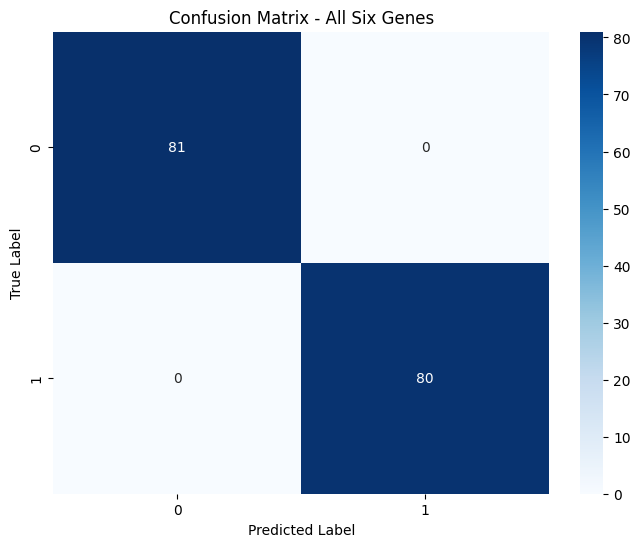

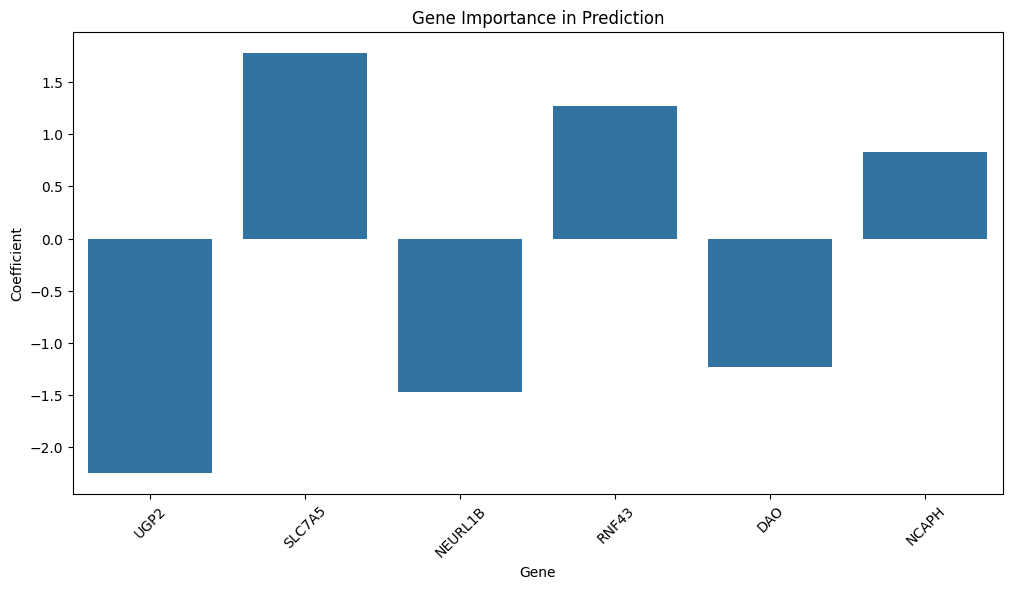

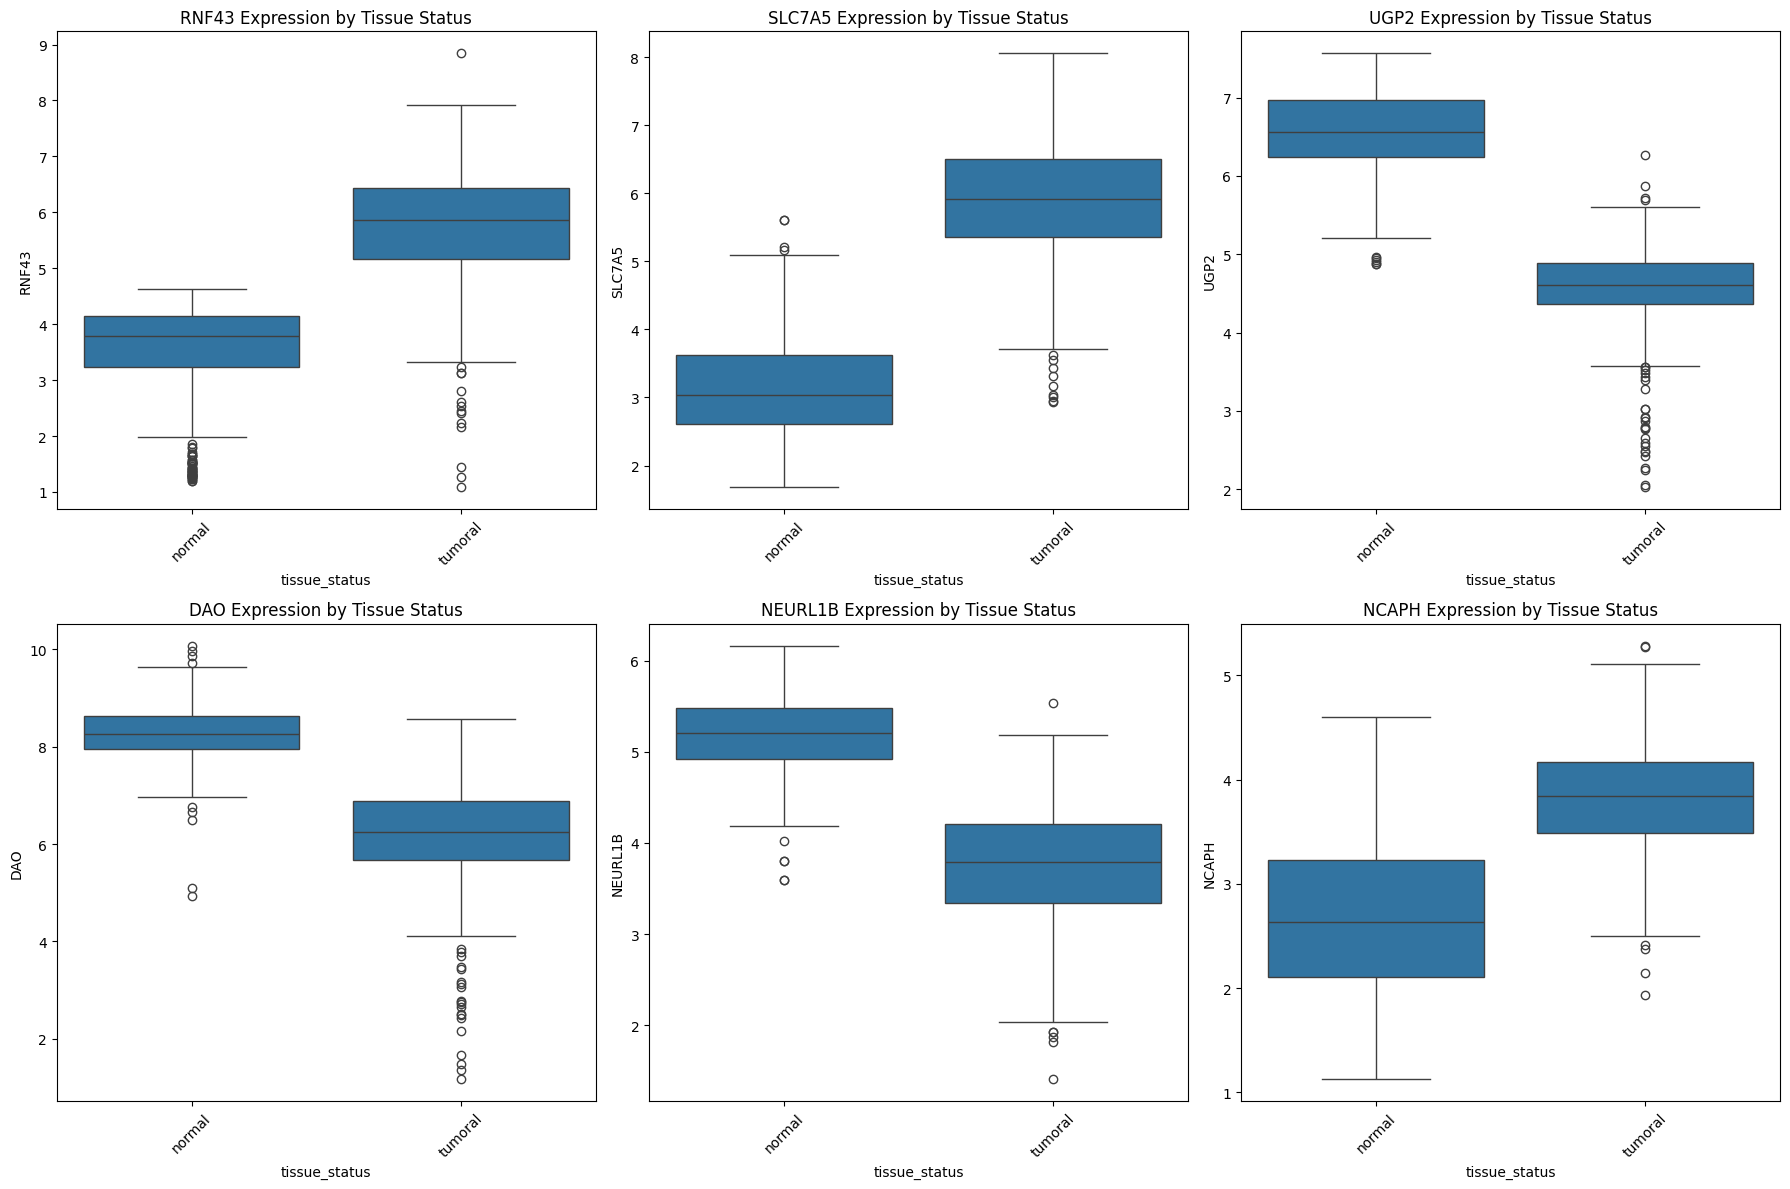

In [25]:
# Update feature selection to include all six genes
X = df[['RNF43', 'SLC7A5', 'UGP2', 'DAO', 'NEURL1B', 'NCAPH']]  # Using all six genes
y = df['tissue_status']  # Target variable

# Convert target to numeric
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)

# Print results
print("\nLogistic Regression Results using all six genes:")
print("--------------------------------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - All Six Genes')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'Gene': ['RNF43', 'SLC7A5', 'UGP2', 'DAO', 'NEURL1B', 'NCAPH'],
    'Coefficient': log_reg.coef_[0]
})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Gene', y='Coefficient', data=feature_importance)
plt.title('Gene Importance in Prediction')
plt.xticks(rotation=45)
plt.show()

# Plot distribution of all genes
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
genes = ['RNF43', 'SLC7A5', 'UGP2', 'DAO', 'NEURL1B', 'NCAPH']
for i, gene in enumerate(genes):
    ax = axes[i//3, i%3]
    sns.boxplot(x=df['tissue_status'], y=df[gene], ax=ax)
    ax.set_title(f'{gene} Expression by Tissue Status')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



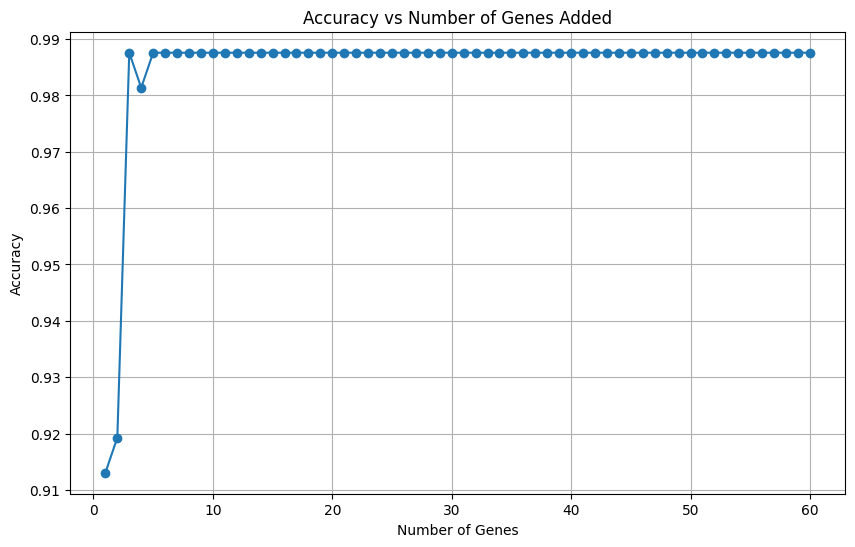

In [26]:

from sklearn.ensemble import RandomForestClassifier

# Assuming df is your DataFrame and X, y are your features and target
X = df.drop(columns=[ "tissue_status"])
y = df["tissue_status"]

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Initialize lists to store the number of genes and corresponding accuracies
num_genes = []
accuracies = []

# Iterate over the number of genes to add
for n in range(1, X_train.shape[1] + 1):
    # Select the top n genes (you can use any feature selection method here)
    selected_genes = X_train.columns[:n]
    
    # Train a Random Forest classifier on the selected genes
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train[selected_genes], y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test[selected_genes])
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append the number of genes and accuracy to the lists
    num_genes.append(n)
    accuracies.append(accuracy)

# Plot the accuracy vs number of genes
plt.figure(figsize=(10, 6))
plt.plot(num_genes, accuracies, marker='o')
plt.xlabel('Number of Genes')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Genes Added')
plt.grid(True)
plt.show()

À mesure que l'on ajoute plus de gènes, la performance du modèle s'améliore jusqu'à atteindre un plateau à 99% de précision avec 5 gènes.

Après 5 gènes, l'ajout de plus de caractéristiques n'améliore pas la précision, ce qui signifie que ces 5 gènes contiennent déjà toute l'information pertinente pour la classification de tissue_status.

Cela indique que l'ajout de gènes supplémentaires n'apporte pas d'informations nouvelles et peut même potentiellement ajouter du bruit au modèle.

En pratique, cela signifie que vous pouvez construire un modèle plus simple et efficace en ne sélectionnant que ces 5 gènes, au lieu d'utiliser toutes les caractéristiques.


Matrice de corrélation entre les gènes sélectionnés :

           RNF43    SLC7A5      UGP2       DAO
RNF43   1.000000  0.642110 -0.614690 -0.441998
SLC7A5  0.642110  1.000000 -0.777432 -0.613886
UGP2   -0.614690 -0.777432  1.000000  0.676845
DAO    -0.441998 -0.613886  0.676845  1.000000


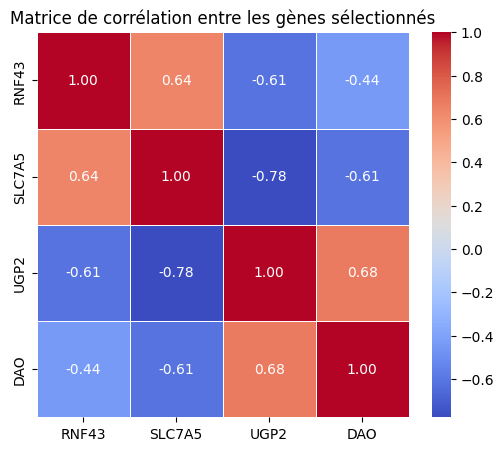

In [38]:
# Sélection des gènes
genes = ['RNF43', 'SLC7A5', 'UGP2', 'DAO']

# Calcul de la matrice de corrélation
correlation_matrix = df[genes].corr()

# Affichage de la matrice
print("\nMatrice de corrélation entre les gènes sélectionnés :\n")
print(correlation_matrix)
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation entre les gènes sélectionnés")
plt.show()



Logistic Regression Results using all five genes (RNF43,UGP2):
--------------------------------------------
Accuracy: 0.9814

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        81
           1       0.98      0.99      0.98        80

    accuracy                           0.98       161
   macro avg       0.98      0.98      0.98       161
weighted avg       0.98      0.98      0.98       161



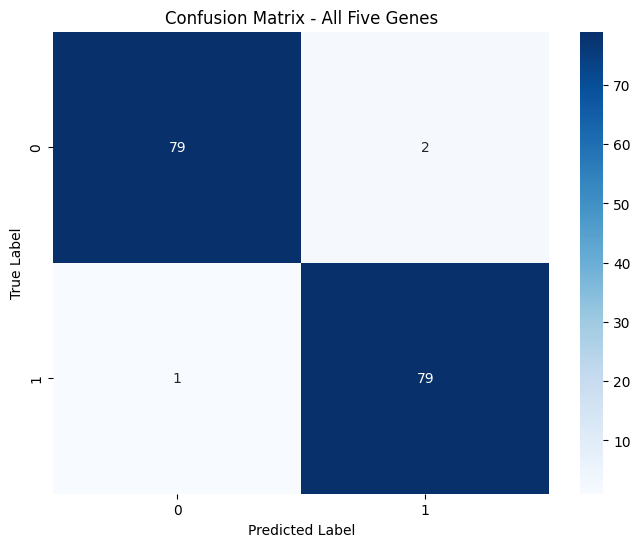

In [57]:

# Update feature selection to include all five genes
X = df[['RNF43', 'UGP2']]  # Using all five genes
y = df['tissue_status']  # Target variable

# Convert target to numeric
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)

# Print results
print("\nLogistic Regression Results using all five genes (RNF43,UGP2):")
print("--------------------------------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - All Five Genes')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()



## KNN

Meilleur k: 1 avec une précision de 1.0000

k-Nearest Neighbors (k-NN) Results:
------------------------------------
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        80

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



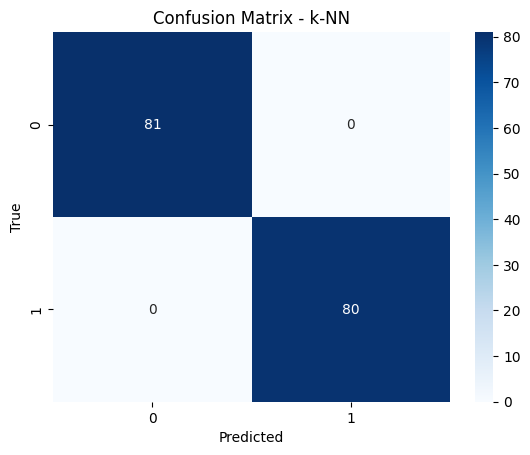

In [41]:
from sklearn.neighbors import KNeighborsClassifier
# Séparation des features et de la variable cible
X = df.drop(columns=['tissue_status'])
y = df['tissue_status'].map({'normal': 0, 'tumoral': 1})

# Convert target to numeric
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

best_k = 0
best_score = 0

for k in range(1, 21):  # Tester k entre 1 et 20
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    score = knn_model.score(X_test_scaled, y_test)
    if score > best_score:
        best_score = score
        best_k = k

print(f"Meilleur k: {best_k} avec une précision de {best_score:.4f}")

# Entraîner avec le meilleur k
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

print("\nk-Nearest Neighbors (k-NN) Results:")
print("------------------------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(classification_report(y_test, y_pred_knn))

sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix - k-NN")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Meilleur k: 3 avec une précision de 0.9752

k-Nearest Neighbors (k-NN) Results:
------------------------------------
Accuracy: 0.9752
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        81
           1       0.96      0.99      0.98        80

    accuracy                           0.98       161
   macro avg       0.98      0.98      0.98       161
weighted avg       0.98      0.98      0.98       161



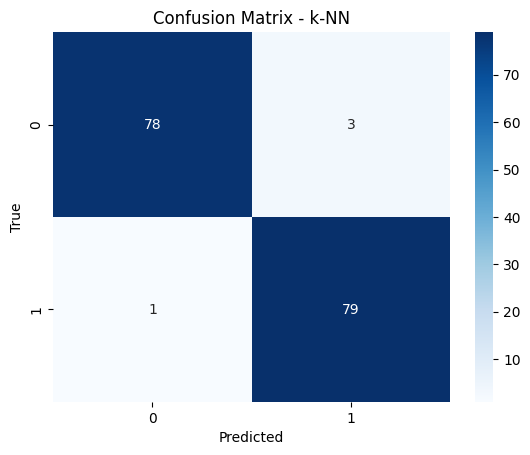

In [44]:
from sklearn.neighbors import KNeighborsClassifier

X = df[['RNF43', 'DAO']]  
y = df['tissue_status'] 

# Convert target to numeric
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

best_k = 0
best_score = 0

for k in range(1, 21):  # Tester k entre 1 et 20
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    score = knn_model.score(X_test_scaled, y_test)
    if score > best_score:
        best_score = score
        best_k = k

print(f"Meilleur k: {best_k} avec une précision de {best_score:.4f}")

# Entraîner avec le meilleur k
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

print("\nk-Nearest Neighbors (k-NN) Results:")
print("------------------------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(classification_report(y_test, y_pred_knn))

sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix - k-NN")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


## SVM


Support Vector Machine (SVM) Results:
--------------------------------------
Accuracy: 0.9689
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        81
           1       0.97      0.96      0.97        80

    accuracy                           0.97       161
   macro avg       0.97      0.97      0.97       161
weighted avg       0.97      0.97      0.97       161



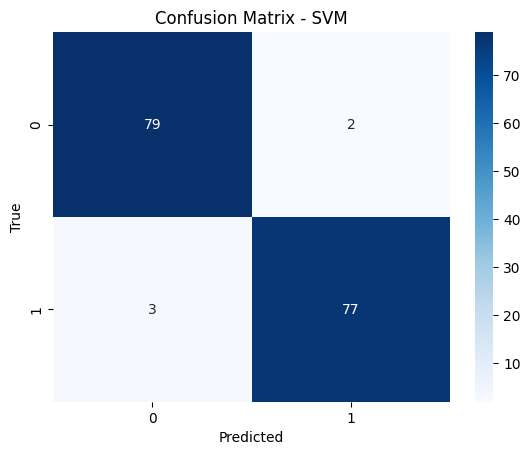

In [45]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

print("\nSupport Vector Machine (SVM) Results:")
print("--------------------------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(classification_report(y_test, y_pred_svm))

# Matrice de confusion
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


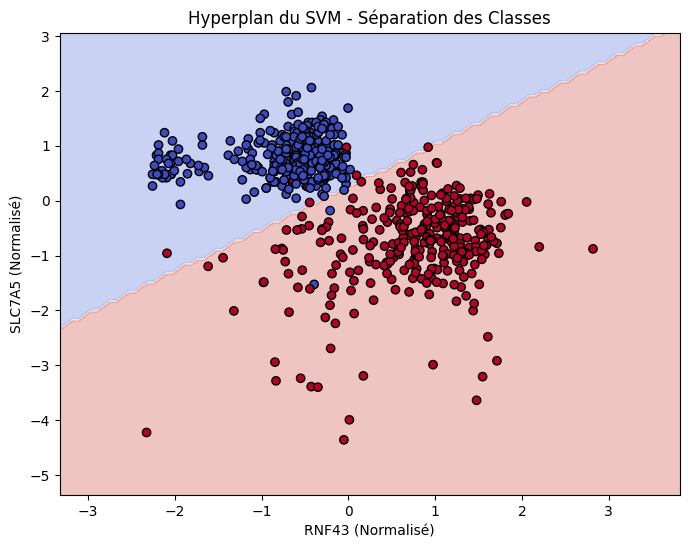

In [46]:
# Création d'un maillage pour la visualisation de l'hyperplan
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Prédiction sur tout le maillage
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Affichage du contour de la décision
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap="coolwarm", edgecolors="k")
plt.xlabel("RNF43 (Normalisé)")
plt.ylabel("SLC7A5 (Normalisé)")
plt.title("Hyperplan du SVM - Séparation des Classes")
plt.show()


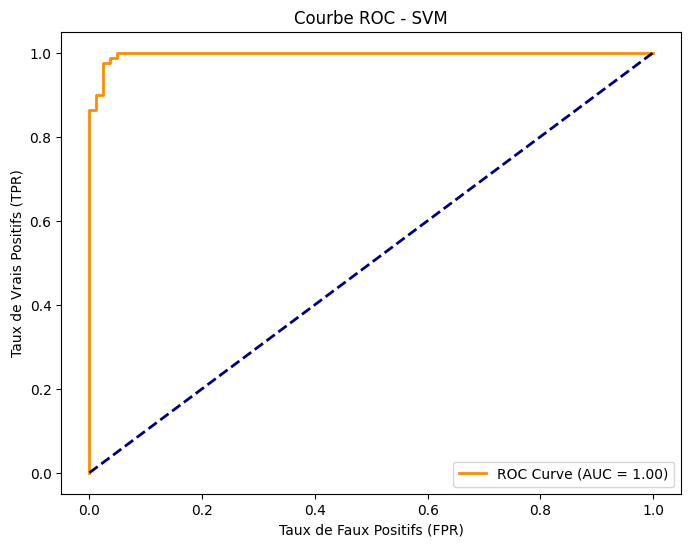

In [49]:
from sklearn.metrics import roc_curve, auc

# Probabilités de prédiction pour la classe positive
y_prob_svm = svm_model.decision_function(X_test_scaled)

# Calcul des valeurs pour la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_svm)
roc_auc = auc(fpr, tpr)

# Tracé de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbe ROC - SVM")
plt.legend(loc="lower right")
plt.show()


## Arbre de Décision

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Séparation des features et de la variable cible
X = df.drop(columns=['tissue_status'])
y = df['tissue_status'].map({'normal': 0, 'tumoral': 1})

# Convert target to numeric
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définition de la grille des hyperparamètres
param_grid = {
    "max_depth": range(1, 21),  # Tester les profondeurs de 1 à 20
    "criterion": ["entropy"]  # Utilisation du critère d'entropie
}

# Initialisation du modèle
tree_model = DecisionTreeClassifier(random_state=42)

# GridSearchCV pour trouver la meilleure profondeur
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Meilleur modèle
best_depth = grid_search.best_params_["max_depth"]
best_tree = grid_search.best_estimator_

print(f"Meilleure profondeur trouvée : {best_depth}")
print(f"Meilleur score d'accuracy en validation croisée : {grid_search.best_score_:.4f}")


Meilleure profondeur trouvée : 3
Meilleur score d'accuracy en validation croisée : 0.9814


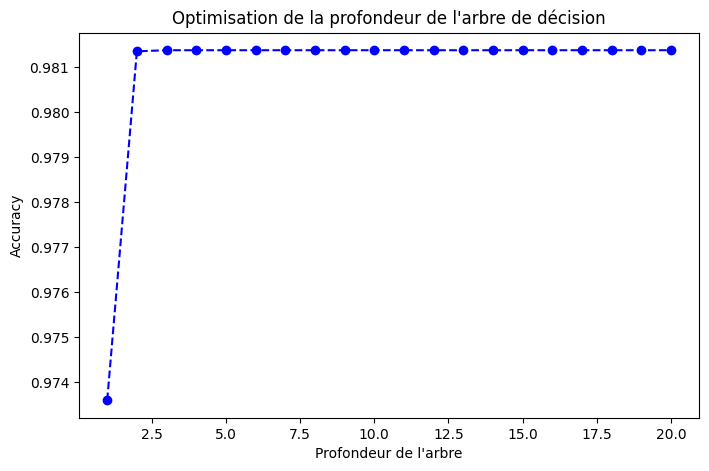

In [63]:
# Extraire les scores pour chaque profondeur testée
depths = param_grid["max_depth"]
accuracy_scores = grid_search.cv_results_["mean_test_score"]

# Tracé de l'évolution de l'accuracy
plt.figure(figsize=(8, 5))
plt.plot(depths, accuracy_scores, marker='o', linestyle='dashed', color='blue')
plt.xlabel("Profondeur de l'arbre")
plt.ylabel("Accuracy")
plt.title("Optimisation de la profondeur de l'arbre de décision")
plt.show()



Arbre de Décision Optimisé (Critère : Entropie) :
Accuracy: 0.9814
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        81
           1       0.96      1.00      0.98        80

    accuracy                           0.98       161
   macro avg       0.98      0.98      0.98       161
weighted avg       0.98      0.98      0.98       161



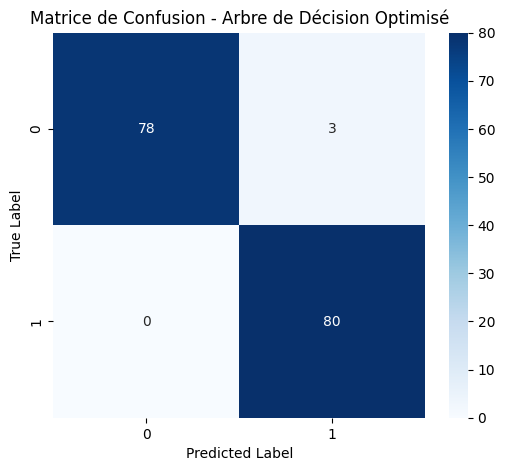

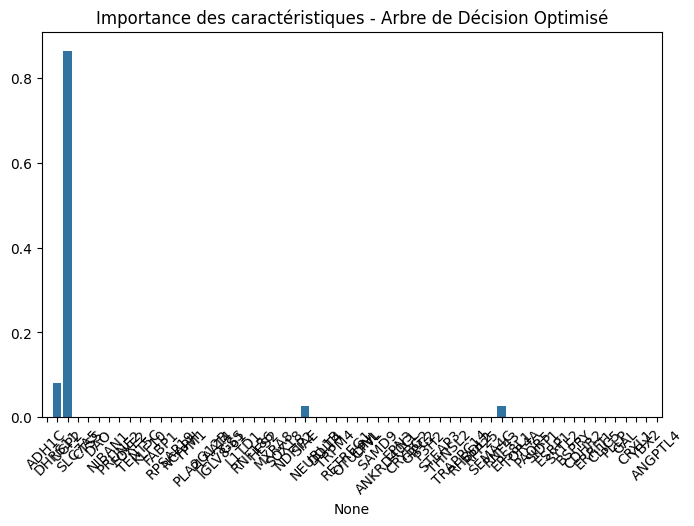

In [64]:
# Prédictions avec l'arbre optimisé
y_pred_best_tree = best_tree.predict(X_test)

print("\nArbre de Décision Optimisé (Critère : Entropie) :")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_tree):.4f}")
print(classification_report(y_test, y_pred_best_tree))

# 🔹 Matrice de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_best_tree), annot=True, cmap='Blues', fmt='d')
plt.title("Matrice de Confusion - Arbre de Décision Optimisé")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 🔹 Importance des caractéristiques
plt.figure(figsize=(8, 5))
sns.barplot(x=X.columns, y=best_tree.feature_importances_)
plt.xticks(rotation=45)
plt.title("Importance des caractéristiques - Arbre de Décision Optimisé")
plt.show()


## Forêt Aléatoire Comparaison des modèles

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Définition de la grille des hyperparamètres
param_grid = {
    "n_estimators": [50, 100, 200, 300],  # Nombre d'arbres
    "max_depth": [5, 10, 15, None],  # Profondeur maximale
    "criterion": ["entropy"],  # Utilisation de l'entropie comme critère de division
}

# Initialisation du modèle
rf_model = RandomForestClassifier(random_state=42)

# GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search_rf = GridSearchCV(rf_model, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Meilleur modèle
best_rf = grid_search_rf.best_estimator_
best_params_rf = grid_search_rf.best_params_

print(f"Meilleurs hyperparamètres trouvés : {best_params_rf}")
print(f"Meilleur score d'accuracy en validation croisée : {grid_search_rf.best_score_:.4f}")


Meilleurs hyperparamètres trouvés : {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 50}
Meilleur score d'accuracy en validation croisée : 0.9969


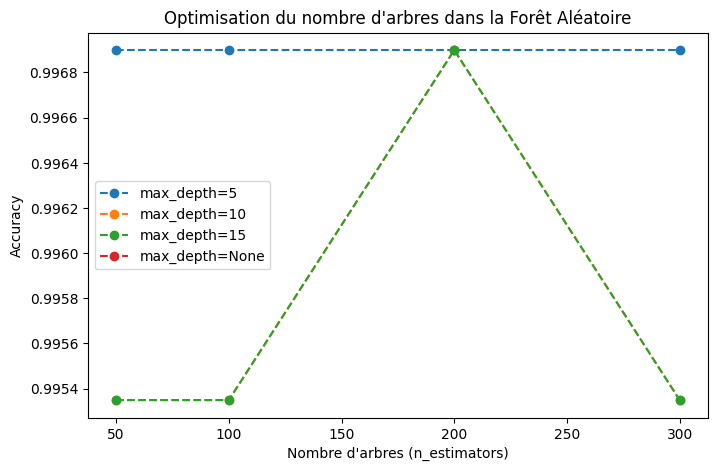

In [66]:
# Extraction des résultats pour chaque combinaison testée
results_df = pd.DataFrame(grid_search_rf.cv_results_)

# Tracé de l'accuracy pour différents `n_estimators`
plt.figure(figsize=(8, 5))
for depth in param_grid["max_depth"]:
    subset = results_df[results_df["param_max_depth"] == depth]
    plt.plot(subset["param_n_estimators"], subset["mean_test_score"], marker="o", linestyle="dashed", label=f"max_depth={depth}")

plt.xlabel("Nombre d'arbres (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Optimisation du nombre d'arbres dans la Forêt Aléatoire")
plt.legend()
plt.show()



Forêt Aléatoire Optimisée (Critère : Entropie) :
Accuracy: 0.9876
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        81
           1       0.98      1.00      0.99        80

    accuracy                           0.99       161
   macro avg       0.99      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



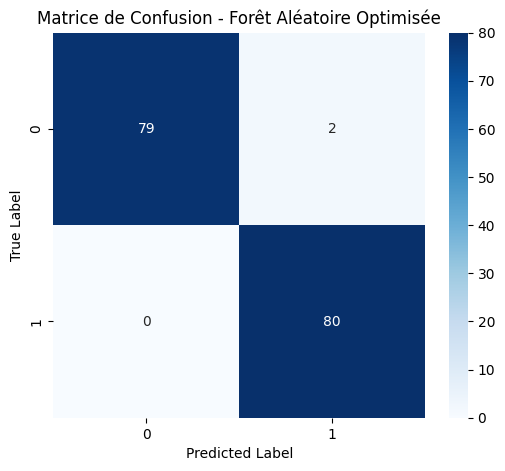

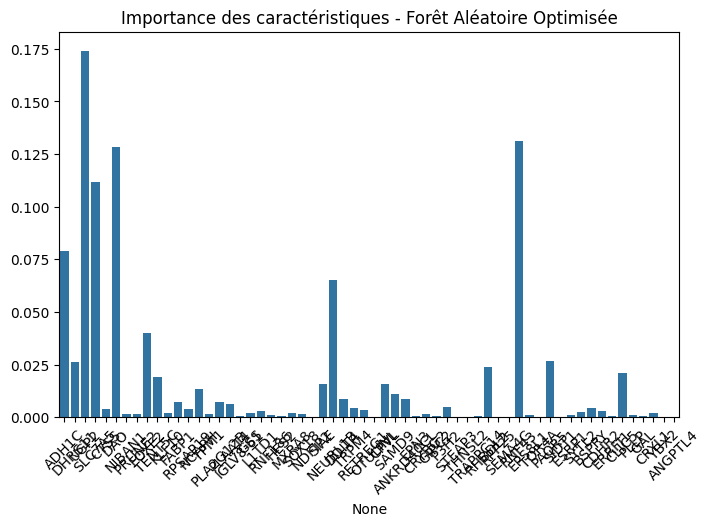

In [67]:
# Prédictions avec le modèle optimisé
y_pred_best_rf = best_rf.predict(X_test)

print("\nForêt Aléatoire Optimisée (Critère : Entropie) :")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_rf):.4f}")
print(classification_report(y_test, y_pred_best_rf))

# 🔹 Matrice de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_best_rf), annot=True, cmap='Blues', fmt='d')
plt.title("Matrice de Confusion - Forêt Aléatoire Optimisée")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 🔹 Importance des caractéristiques
plt.figure(figsize=(8, 5))
sns.barplot(x=X.columns, y=best_rf.feature_importances_)
plt.xticks(rotation=45)
plt.title("Importance des caractéristiques - Forêt Aléatoire Optimisée")
plt.show()


##  Comparaison des modèles

In [71]:
results = pd.DataFrame({
    "Modèle": ["Régression Logistique", "SVM", "k-NN", "Arbre de Décision", "Forêt Aléatoire"],
    "Accuracy": [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_best_tree),
        accuracy_score(y_test, y_pred_best_rf)
    ]
})

print(results.sort_values(by="Accuracy", ascending=False))


                  Modèle  Accuracy
4        Forêt Aléatoire  0.987578
0  Régression Logistique  0.981366
3      Arbre de Décision  0.981366
2                   k-NN  0.975155
1                    SVM  0.968944


## Cas pratique

In [72]:
patient = [[4.68, 4.10, 7.59]]

# Prédire avec chaque modèle
print("Prédiction Logistique :", log_reg.predict(patient))
print("Prédiction SVM :", svm_model.predict(patient))
print("Prédiction k-NN :", knn_best.predict(patient))
print("Prédiction Arbre de décision :", dt.predict(patient))
print("Prédiction Forêt aléatoire :", rf.predict(patient))


ValueError: X has 3 features, but LogisticRegression is expecting 2 features as input.